# Analysis of season-wise crop production  data

This analysis is divided into 4 parts

Part I) Data Exploration

Part II) Continous Learning model that not only learns from past data but also from the feedback data

Part III) Future scope of Work: If additional data pertaining to Farmer's actions are known like, Date of sowing of seeds, types of pesticides used at different stages of cycle,
    -> using RL, can predict the right time to Sow Seeds, this can help him maximise production. 
    -> right pesticides to use....

Part IV) Business Analytics..
-> Price KPI's (from farmer's perspective, company's perspective..)
-> Yield KPI's
TO BE DONE....

# PART I- Data Exploration
I have downloaded all the relevant data from https://data.gov.in/. This site has all the useful information related to Farming

In [228]:
import numpy as np
import pandas as pd

#https://data.gov.in/catalog/district-wise-season-wise-crop-production-statistics
df_crop_produce = pd.read_csv('Crop_produce_I.csv') 

#https://data.gov.in/resources/subdivision-wise-rainfall-and-its-departure-1901-2015
df_rainfall = pd.read_csv('sub-division_rainfall_act_dep_1901-2015_II.csv')

#https://data.gov.in/catalog/all-india-seasonal-and-annual-mean-temperature-series
df_temp = pd.read_csv('Mean_Temp_III.csv')

## Period of consideration is from 1997-2015
I have only considered data during the period 1997-2015 as crop_production data is from 1997-2015 only.
Also, did not use any libraries apart from Matplotlib for plots

## Univariate Plots -

## Temperature Plots

Few records of temperature data 
      YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
96   1997  17.86  19.88  23.64  25.55  27.86  28.33  28.01  27.27  26.81   
97   1998  18.84  20.60  22.98  27.00  29.18  28.88  27.78  27.42  26.70   
98   1999  18.32  21.26  24.18  27.66  28.13  27.95  27.58  27.08  26.90   
99   2000  18.87  19.78  23.22  27.27  28.92  28.02  27.34  26.98  26.53   
100  2001  18.50  21.00  24.12  26.90  29.46  28.13  27.63  27.62  26.86   

       OCT    NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  Kharif  \
96   24.48  22.05  19.31   24.10    18.87    25.69    27.60    21.89   26.64   
97   25.27  22.48  19.21   24.76    19.72    26.41    27.69    22.42   26.79   
98   24.97  22.33  19.57   24.67    19.75    26.66    27.38    22.29   26.63   
99   25.58  22.75  19.66   24.60    19.33    26.47    27.23    22.68   26.61   
100  25.49  22.51  19.55   24.73    19.75    26.82    27.47    22.52   26.90   

      Rabi  
96   21.20  
97

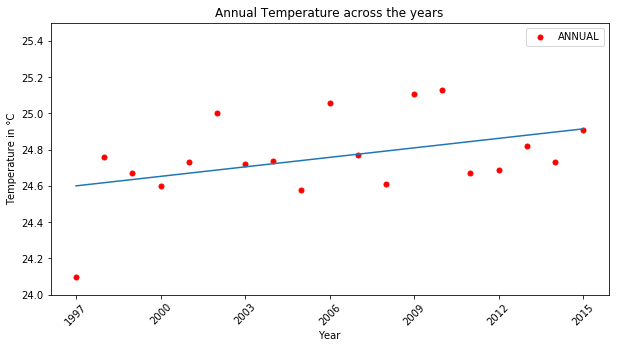

Clearly the temperature is increasing, perhaps not at the rate shown in the figure as it might have been dominated by low temperature in 1997. Nevertheless it is on the rise


In [410]:
#Plot Temperature
import numpy as np 

df_temp = df_temp[(df_temp['YEAR']>1996) & (df_temp['YEAR']<2016)] 
print('Few records of temperature data', '\n', df_temp.head())

plt.figure(figsize=(10,5))
plt.scatter(df_temp['YEAR'], df_temp['ANNUAL'], s = 25, c = 'red') 
b, m = polyfit(df_temp['YEAR'], df_temp['ANNUAL'], 1)
plt.plot(np.unique(df_temp['YEAR']), np.poly1d(np.polyfit(df_temp['YEAR'],df_temp['ANNUAL'], 1))(np.unique(df_temp['YEAR'])))
plt.ylim(24, 25.5) 
plt.xlabel('Year')
plt.ylabel('Temperature in °C') 
plt.title('Annual Temperature across the years')
plt.legend()
plt.xticks(range(1997, 2016, 3),range(1997, 2016, 3), rotation=45)
plt.savefig("Annual_Temperature.pdf")
plt.show()

print('Clearly the temperature is increasing, perhaps not at the rate shown in the figure as it might have been dominated by \
low temperature in 1997. Nevertheless it is on the rise')

#Compute Avg Kharif and Rabi season Temperature
df_temp['Kharif'] = round((df_temp['JUL'] + df_temp['AUG'] + df_temp['SEP'] + df_temp['OCT'])/float(4),2)
df_temp['Rabi'] = round((df_temp['OCT'] + df_temp['NOV'] + df_temp['DEC'] + df_temp['JAN'] + df_temp['FEB'] + \
                         df_temp['MAR'])/float(6), 2)

## Rainfall Plots
Explore Rainfall dataset

In [229]:
#Explore Rainfall Data
import matplotlib.pyplot as plt

print('First few records of Rainfall dataset ', '\n', df_rainfall.head(), '\n')

#removing summary records, represented by the value '1901-2015' for the 'YEAR' column
df_rainfall = df_rainfall[df_rainfall['YEAR'] !='1901-2015']

#Only considering data from the YEAR 1997
df_rainfall = df_rainfall[df_rainfall['YEAR'].apply(int)>1996]
 

First few records of Rainfall dataset  
                  SUBDIVISION       YEAR                 Parameter    JAN  \
0  ANDAMAN & NICOBAR ISLANDS  1901-2015                      Mean   49.2   
1  ANDAMAN & NICOBAR ISLANDS  1901-2015        Standard deviation   71.3   
2  ANDAMAN & NICOBAR ISLANDS  1901-2015  Coefficient of variation  144.9   
3  ANDAMAN & NICOBAR ISLANDS       1901                    Actual   49.2   
4  ANDAMAN & NICOBAR ISLANDS       1901      Percentage departure   -0.1   

     FEB    MAR   APR    MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC  \
0   27.6   30.0  72.2  355.6  471.4  397.5  400.5  431.3  289.5  233.0  153.3   
1   38.8   43.6  66.8  151.2  147.0  151.9  142.6  146.7   99.4  119.4  129.5   
2  140.4  145.5  92.5   42.5   31.2   38.2   35.6   34.0   34.3   51.2   84.5   
3   87.1   29.2   2.3  528.8  517.5  365.1  481.1  332.6  388.5  558.2   33.6   
4  215.9   -2.6 -96.8   48.7    9.8   -8.2   20.1  -22.9   34.2  139.5  -78.1   

   ANNUAL     J

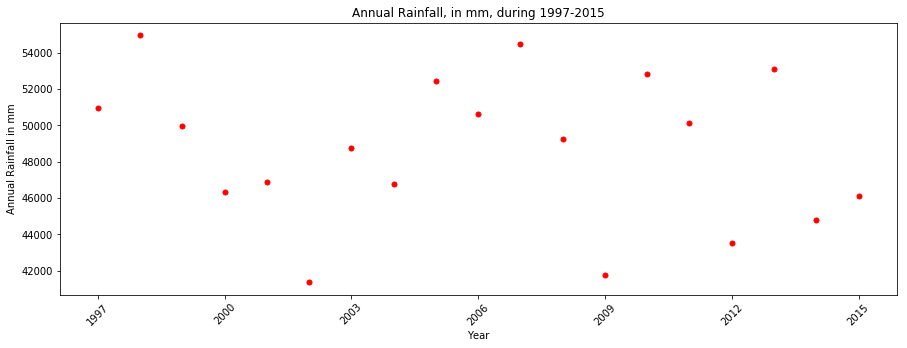

There is a cyclic pattern to Rainfall with lowest rainfalls in 2002, 2009, 2014 and highest rainfalls in 1998, 2005, 2007, 2013 



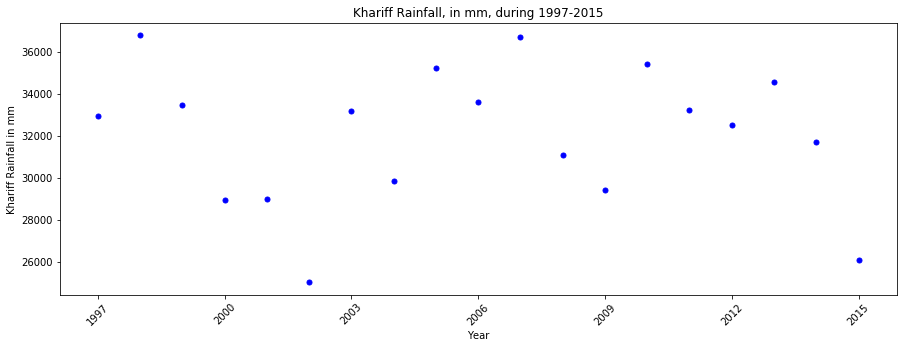

From the above graph, the amount of rainfall in Khariff season accounts for about 2/3rds of Annual Rainfall, which is understandable as the Kharif is mainly in the Autumn Season. Again it appears to have a cyclic pattern


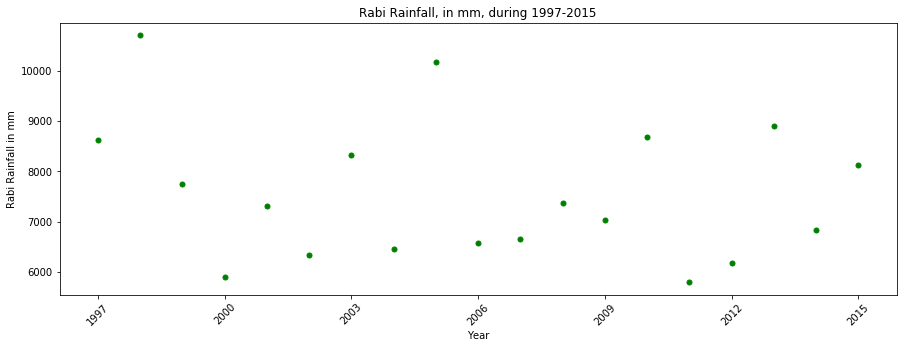

It is not as cyclic as the first 2 graphs, however there is still some cyclicity. Again, as the Rabi season is in  Oct-March months when there is relatively less rainfall


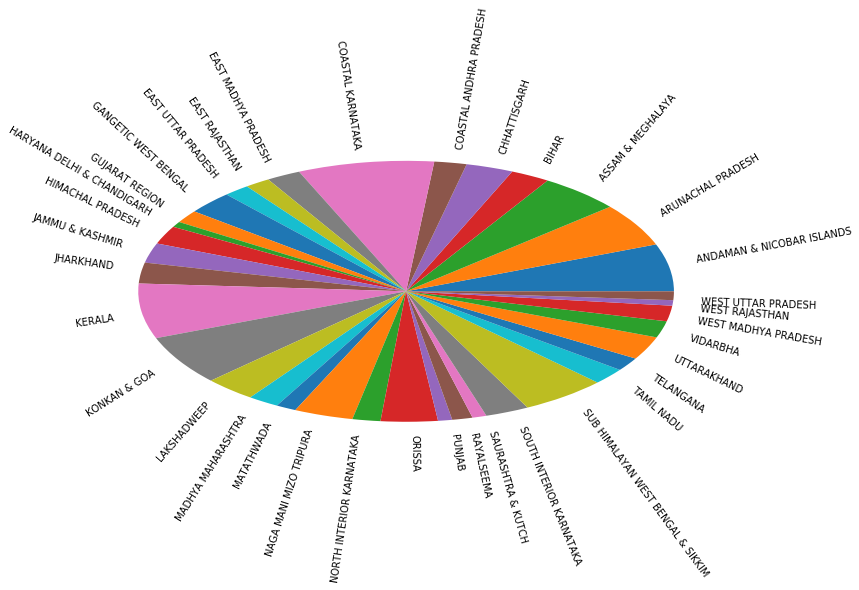

Coastal Karnataka received the highest rainfall followed by North-Eastern States, Kerala and Andaman islands. Interesting to note that, UP received relatively lesser rainfall despite being known as one of the largest crop producing states 



In [293]:
#Plot 4 plots relating to Rainfall
# -> Annual Rainfall over the years in India
# -> Annual Rainfall over the years during Khariff Season
# -> Annual Rainfall over the years during Rabi Season
# -> Annual Rainfall during 2014 in Indian States

# 1) Annual Rainfall over the years
res = df_rainfall[df_rainfall['Parameter'] == 'Actual'].groupby(['YEAR'])['ANNUAL'].sum()
plt.figure(figsize=(15,5))
plt.scatter(list(res._index), res.values, s = 25, c = 'red')  
plt.xlabel('Year', {'fontsize' : 'medium'})
plt.ylabel('Annual Rainfall in mm') 
plt.title('Annual Rainfall, in mm, during 1997-2015') 
plt.xticks(range(1997, 2016, 3),range(1997, 2016, 3), rotation=45)
#plt.savefig("Annual_Rainfall.pdf")
plt.show() 
print('There is a cyclic pattern to Rainfall with lowest rainfalls in 2002, 2009, 2014 and highest rainfalls \
in 1998, 2005, 2007, 2013', '\n')

# -> Annual Rainfall over the years during Khariff Season 
df_rainfall['Khariff'] = df_rainfall['JUL'] + df_rainfall['AUG'] + df_rainfall['SEP'] + df_rainfall['OCT']
res = df_rainfall[df_rainfall['Parameter'] == 'Actual'].groupby(['YEAR'])['Khariff'].sum()
plt.figure(figsize=(15,5))
plt.scatter(list(res._index), res.values, s = 25, c = 'blue')  
plt.xlabel('Year', {'fontsize' : 'medium'})
plt.ylabel('Khariff Rainfall in mm') 
plt.title('Khariff Rainfall, in mm, during 1997-2015') 
plt.xticks(range(1997, 2016, 3),range(1997, 2016, 3), rotation=45) 
plt.show() 
print('From the above graph, the amount of rainfall in Khariff season accounts for about 2/3rds of Annual Rainfall, \
which is understandable as the Kharif is mainly in the Autumn Season. Again it appears to have a cyclic pattern')

# -> Annual Rainfall over the years during Rabi Season
df_rainfall['Rabi'] = df_rainfall['OCT'] + df_rainfall['NOV'] + df_rainfall['DEC'] + df_rainfall['JAN'] + df_rainfall['FEB'] \
                      + df_rainfall['MAR']
res = df_rainfall[df_rainfall['Parameter'] == 'Actual'].groupby(['YEAR'])['Rabi'].sum()
plt.figure(figsize=(15,5))
plt.scatter(list(res._index), res.values, s = 25, c = 'green')  
plt.xlabel('Year', {'fontsize' : 'medium'})
plt.ylabel('Rabi Rainfall in mm') 
plt.title('Rabi Rainfall, in mm, during 1997-2015') 
plt.xticks(range(1997, 2016, 3),range(1997, 2016, 3), rotation=45)
#plt.savefig("Annual_Rainfall.pdf")
plt.show() 
print('It is not as cyclic as the first 2 graphs, however there is still some cyclicity. Again, as the Rabi season is in \
 Oct-March months when there is relatively less rainfall')

# 4) Annual Rainfall during 2014 in India 
plt.figure(figsize=(10,5))
res = df_rainfall[(df_rainfall['YEAR'] == '2014') & (df_rainfall['Parameter'] == 'Actual')]   
plt.pie(res['ANNUAL'].values, labels = res['SUBDIVISION'], rotatelabels=True, radius = 1.2)    
#plt.savefig("Annual_Rainfall_2015.pdf")
plt.show() 
print('Coastal Karnataka received the highest rainfall followed by North-Eastern States, Kerala and Andaman islands. Interesting to note that, \
UP received relatively lesser rainfall despite being known as one of the largest crop producing states', '\n')

Overall, the first 3 graphs appear to have a cyclic pattern.

Karnataka, North Eastern states, Kerala and Andaman islands had the highest rainfall during 2014


## Crop Production Plots

In [231]:
#Print first few records of Crop Data
print(df_crop_produce.head())

#remove Extra Spaces in Season Col
def strip(x):
    return x.strip()
df_crop_produce['Season'] = df_crop_produce['Season'].apply(strip) 

print('\nDifferent types of seasons', df_crop_produce['Season'].unique(), '\n')

#Print all the crops across every Season
print('Different types of Whole Year crops ', df_crop_produce[df_crop_produce['Season'] == 'Whole Year']['Crop'].unique(), '\n' )
print('Different types of Kharif crops ', df_crop_produce[df_crop_produce['Season'] == 'Kharif']['Crop'].unique(), '\n' )
print('Different types of Rabi crops ', df_crop_produce[df_crop_produce['Season'] == 'Rabi']['Crop'].unique(), '\n' )
print('Different types of Autumn crops ', df_crop_produce[df_crop_produce['Season'] == 'Autumn']['Crop'].unique(), '\n' )
print('Different types of Summer crops ', df_crop_produce[df_crop_produce['Season'] == 'Summer']['Crop'].unique(), '\n' )
print('Different types of Winter crops ', df_crop_produce[df_crop_produce['Season'] == 'Winter']['Crop'].unique(), '\n' )

kharif_crops = df_crop_produce[df_crop_produce['Season'] == 'Kharif']['Crop'].unique()
rabi_crops = df_crop_produce[df_crop_produce['Season'] == 'Rabi']['Crop'].unique()

only_kharif_not_rabi = list(set(kharif_crops).difference(set(rabi_crops)))
print('\n', 'Crops only grown in Kharif and not in Rabi Season \n', only_kharif_not_rabi )

only_rabi_not_kharif = list(set(rabi_crops).difference(set(kharif_crops)))
print('\n','Crops only grown in Rabi and not in Kharif Season \n', only_rabi_not_kharif )

                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  

Different types of seasons ['Kharif' 'Whole Year' 'Autumn' 'Rabi' 'Summer' 'Winter'] 

Different types of Whole Year crops  ['Banana' 'Cashewnut' 'Coconut ' 'Dry ginger' 'Sugarcane' 'Sweet potato'
 'Tapioca' 'Arecanut' 'Black pepper' 'Dry chillies' 'other oilseeds'
 'Turmeric' 'Tobacco' 'Onion' 

Most of the crops are grown in both Kharif and Rabi season, very few Seasonal crops are present.
Also, interesting to note that many crops that are grown only either in Kharif or in Rabi season happen to be Fruits. "Mango", "Orange", "Sapota" are only Kharif crops, whereas "Pineapple", "Lentil" are only Rabi crops

## Crop-Produce Plots
Explore Crop Dataset.

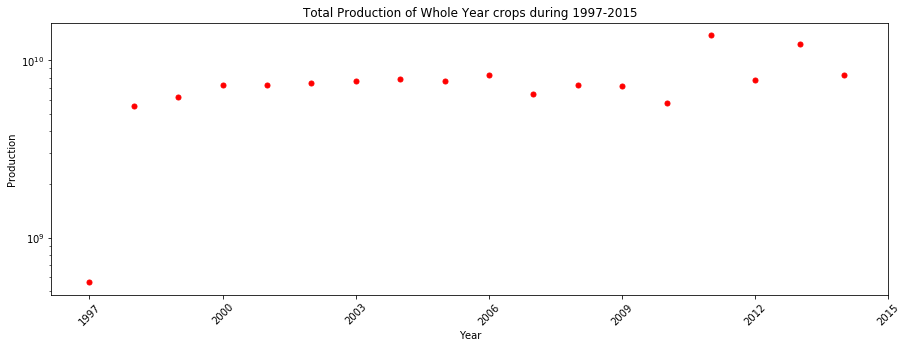

Production is fairly constant. However, in 2015 the production value is ZERO, hence is an outlier. In 1997, the production is considerably less that other years. 



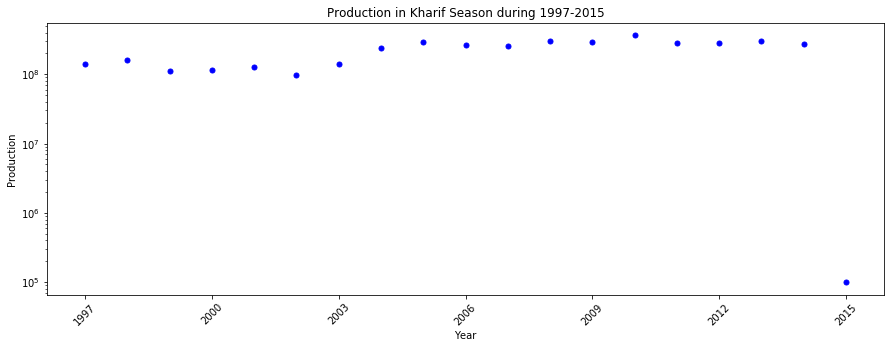

Production is fairly constant. However, in 2015 the production value is very less compared to other years, hence an outlier. 



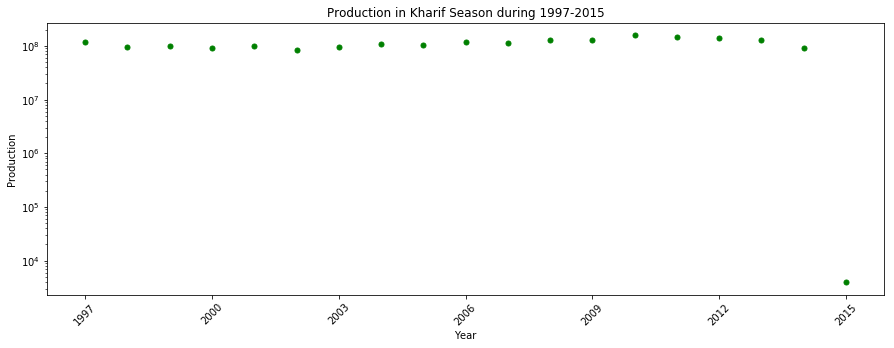

Again Production is fairly constant. However, in 2015 the production value is very less compared to other years, hence an outlier. 



In [232]:
#plot Annual Production of Whole Year crops across the years
res = df_crop_produce[df_crop_produce['Season'] == 'Whole Year'].groupby(['Crop_Year'])['Production'].sum()  
plt.figure(figsize=(15,5))
plt.scatter(list(res._index), res.values, s = 25, c = 'red')  
plt.xlabel('Year', {'fontsize' : 'medium'})
plt.ylabel('Production') 
plt.title('Total Production of Whole Year crops during 1997-2015') 
plt.xticks(range(1997, 2016, 3),range(1997, 2016, 3), rotation=45)
plt.yscale('log')
plt.show()

print('Production is fairly constant. However, in 2015 the production value is ZERO, hence is an outlier. Also, in 1997, the \
production is considerably less that other years.', '\n')

#plot Annual Production of Kharif across the years
res = df_crop_produce[df_crop_produce['Season'] == 'Kharif'].groupby(['Crop_Year'])['Production'].sum()  
plt.figure(figsize=(15,5))
plt.scatter(list(res._index), res.values, s = 25, c = 'blue')  
plt.xlabel('Year', {'fontsize' : 'medium'})
plt.ylabel('Production') 
plt.title('Production in Kharif Season during 1997-2015') 
plt.xticks(range(1997, 2016, 3),range(1997, 2016, 3), rotation=45)
plt.yscale('log')
plt.show()
print('Production is fairly constant. However, in 2015 the production value is very less compared to other years', '\n')

#plot Annual Production of Rahi across the years
res = df_crop_produce[df_crop_produce['Season'] == 'Rabi'].groupby(['Crop_Year'])['Production'].sum() 
plt.figure(figsize=(15,5))
plt.scatter(list(res._index), res.values, s = 25, c = 'green')  
plt.xlabel('Year', {'fontsize' : 'medium'})
plt.ylabel('Production') 
plt.title('Production in Kharif Season during 1997-2015') 
plt.xticks(range(1997, 2016, 3),range(1997, 2016, 3), rotation=45)
plt.yscale('log')
plt.show()
print('Again Production is fairly constant. However, in 2015 the production value is very less compared to other years, hence \
an outlier.','\n')


### Considering only crops in Kharif and Rabi Season for further analysis

Dataset has many Seasons, but I am focussing only on Kharif and Rabi season crops for further analysis as all major crops are grown in this season. Also, another reason is, 'Whole Year' season production has outliers, most notably 2015 data is missing. 

#### Kharif Season Plots

                 Statewise wise Production in 2014 Kharif Season


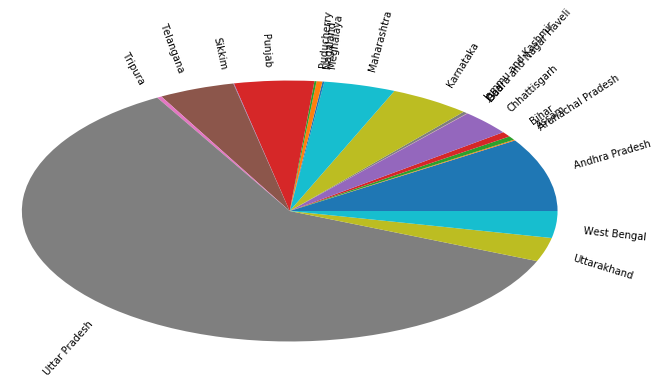

Uttar pradesh accounts for highest production in Kharif season in 2014. It is interesting to observe that UP received average rainfall compared to other states, yet it significantly outperforms when it comes to Production. 
 

                 Statewise wise Production per unit Area in 2014 Kharif Season


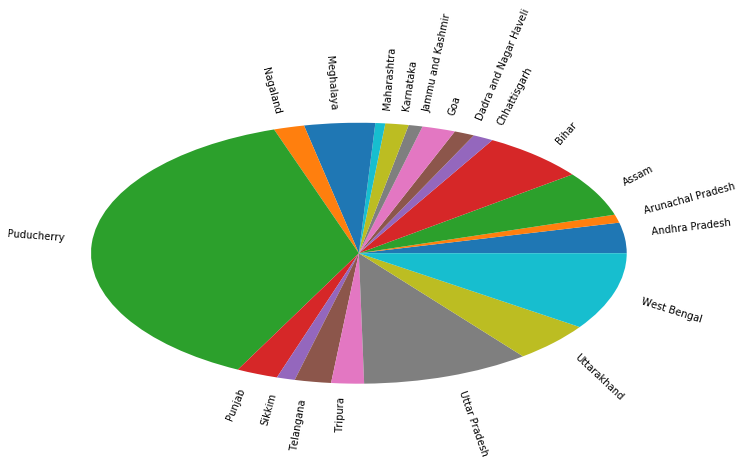

Again UP has one of the highest (2nd) Production per unit Area, followed by West Bengal and Bihar. So the north-central and eastern belt of India are highly suitable for Farming 



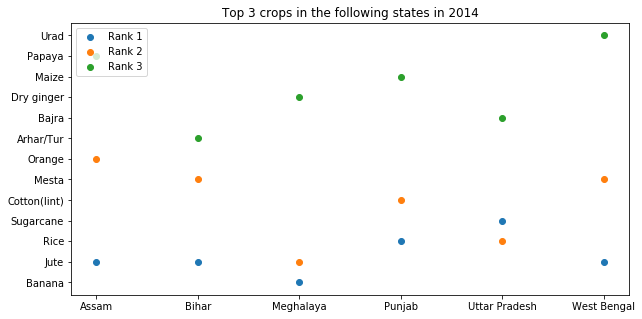

           Jute and Rice are the most cultivated crop in Eastern and north-central belt 



In [402]:
#Kharif Plots
#plot Statewise wise Kharif Season in 2014, 
plt.figure(figsize=(10,5))
res = df_crop_produce[(df_crop_produce['Crop_Year'] == 2014) & (df_crop_produce['Season'] == 'Kharif')].groupby(['State_Name'])['Production'].sum()   
plt.pie(res.values, labels = list(res._index), rotatelabels=True, radius = 1.2)     
print('                 Statewise wise Production in 2014 Kharif Season')
plt.show() 
print('Uttar pradesh accounts for highest production in Kharif season in 2014. It is interesting to observe that UP received \
average rainfall compared to other states, yet it significantly outperforms when it comes to Production.', '\n', '\n')

#production per unit Area
plt.figure(figsize=(10,5))
production = df_crop_produce[(df_crop_produce['Crop_Year'] == 2014) & (df_crop_produce['Season'] == 'Kharif')].groupby(['State_Name'])['Production'].sum()   
area = df_crop_produce[(df_crop_produce['Crop_Year'] == 2014) & (df_crop_produce['Season'] == 'Kharif')].groupby(['State_Name'])['Area'].sum()   
prod_per_area = [float(p)/a for p, a in zip(production.values, area.values)]
plt.pie(prod_per_area, labels = list(area._index), rotatelabels=True, radius = 1.2)    
print('                 Statewise wise Production per unit Area in 2014 Kharif Season')
plt.show() 
print('Again UP has one of the highest (2nd) Production per unit Area, followed by West Bengal and Bihar. So the north-central and \
eastern belt of India are highly suitable for Farming', '\n')

#Plot the top 3 crops in North-central belts of India
res = df_crop_produce[(df_crop_produce['Crop_Year'] == 2014) & (df_crop_produce['Season'] == 'Kharif')].groupby(['State_Name', 'Crop'])['Production'].sum()   
x = ['Uttar Pradesh', 'Bihar', 'West Bengal', 'Assam', 'Meghalaya', 'Punjab']
top_3_ = [tuple(res[state].sort_values(ascending=False)[:3].index) for state in x]
plt.figure(figsize = (10,5))   
for i in range(3):
    plt.plot(x,[pt[i] for pt in top_3_], 'o', label = 'Rank %s'%(i+1))
plt.legend(loc=2)
plt.title('Top 3 crops in the following states in 2014')
plt.show()
print('           Jute and Rice are the most cultivated crop in Eastern and north-central belt', '\n')

#### Rabi Season Plots

                 Statewise wise Production in 2014 Rabi Season


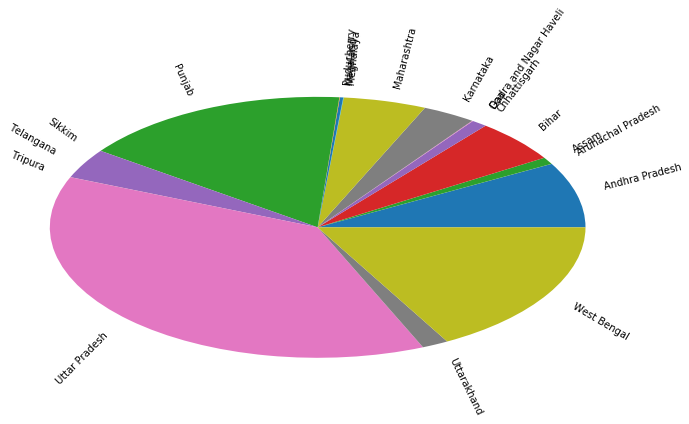

Once again, Uttar pradesh accounts for highest production in Rabi season in 2014. Other states with high production are West Bengal, Punjab, Maharastra, Andhra Pradesh and Bihar. 
 

                 Statewise wise Production per unit Area in 2014 Rabi Season


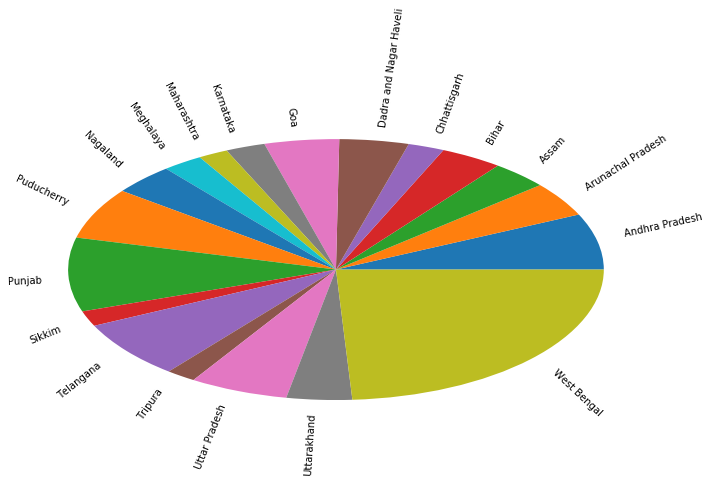

West Bengal has the highest Production per unit Area, followed by Uttar pradesh, Punjab and Telangana.This time the north-central and south-central belt of India were highly suitable for Farming 



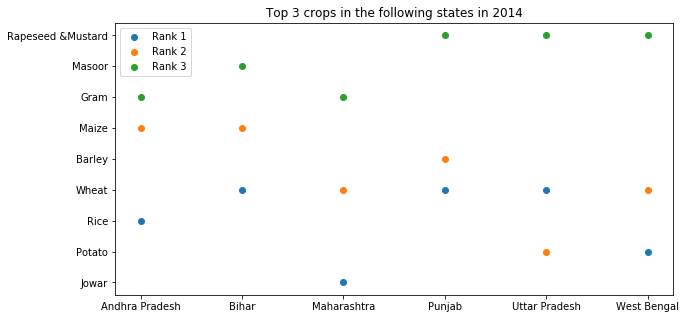

           Clearly Wheat is the largest cultivated crop in Rabi Season, followed by protein rich pulses 



In [294]:
#Rabi Plots: Similar plots as above, but for Rabi season
#plot Statewise wise Rabi Season in 2014, 
plt.figure(figsize=(10,5))
res = df_crop_produce[(df_crop_produce['Crop_Year'] == 2014) & (df_crop_produce['Season'] == 'Rabi')].groupby(['State_Name'])['Production'].sum()   
plt.pie(res.values, labels = list(res._index), rotatelabels=True, radius = 1.2)     
print('                 Statewise wise Production in 2014 Rabi Season')
plt.show() 
print('Once again, Uttar pradesh accounts for highest production in Rabi season in 2014. Other states with high production \
are West Bengal, Punjab, Maharastra, Andhra Pradesh and Bihar.', '\n', '\n')

#production per unit Area
plt.figure(figsize=(10,5))
production = df_crop_produce[(df_crop_produce['Crop_Year'] == 2014) & (df_crop_produce['Season'] == 'Rabi')].groupby(['State_Name'])['Production'].sum()   
area = df_crop_produce[(df_crop_produce['Crop_Year'] == 2014) & (df_crop_produce['Season'] == 'Rabi')].groupby(['State_Name'])['Area'].sum()   
prod_per_area = [float(p)/a for p, a in zip(production.values, area.values)]
plt.pie(prod_per_area, labels = list(area._index), rotatelabels=True, radius = 1.2)    
print('                 Statewise wise Production per unit Area in 2014 Rabi Season')
plt.show() 
print('West Bengal has the highest Production per unit Area, followed by Uttar pradesh, Punjab and Telangana.\
This time the north-central and south-central belt of India were highly suitable for Farming', '\n')

#Plot the top 3 crops in North-central and south-central belts of India
res = df_crop_produce[(df_crop_produce['Crop_Year'] == 2014) & (df_crop_produce['Season'] == 'Rabi')].groupby(['State_Name', 'Crop'])['Production'].sum()   
x = ['Uttar Pradesh', 'Bihar', 'West Bengal', 'Maharashtra', 'Andhra Pradesh', 'Punjab']
top_3_ = [tuple(res[state].sort_values(ascending=False)[:3].index) for state in x]
plt.figure(figsize = (10,5))   
for i in range(3):
    plt.plot(x,[pt[i] for pt in top_3_], 'o', label = 'Rank %s'%(i+1))
plt.legend(loc=2)
plt.title('Top 3 crops in the following states in 2014')
plt.show()
print('           Clearly Wheat is the largest cultivated crop in Rabi Season, followed by protein rich pulses', '\n')

## Bivariate Plots -

## Rainfall vs Temperature

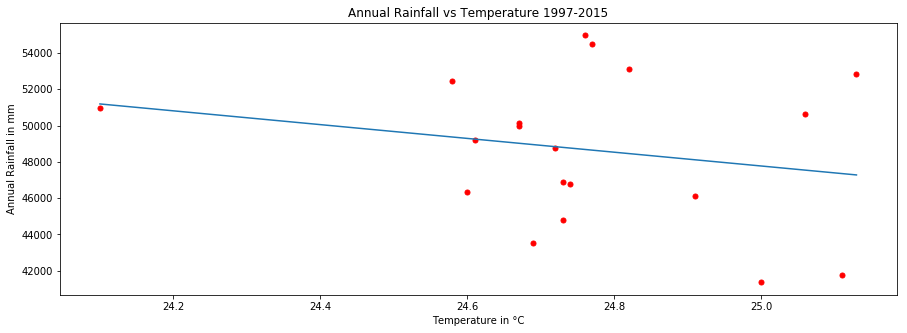

We observe negative correlation between Temperature and Rainfall, as validated in studies (https://www.ipcc.ch/publications_and_data/ar4/wg1/en/ch3s3-3-5.html)


In [312]:
df_temp = df_temp[(df_temp['YEAR']>1996) & (df_temp['YEAR']<2016)] 
rainfall = df_rainfall[df_rainfall['Parameter'] == 'Actual'].groupby(['YEAR'])['ANNUAL'].sum()
plt.figure(figsize=(15,5)) 
plt.scatter(df_temp['ANNUAL'], rainfall.values, s = 25, c = 'red')  
plt.plot(np.unique(df_temp['ANNUAL']), np.poly1d(np.polyfit(df_temp['ANNUAL'], rainfall.values, 1))(np.unique(df_temp['ANNUAL'])))
plt.xlabel('Temperature in °C', {'fontsize' : 'medium'})
plt.ylabel('Annual Rainfall in mm') 
plt.title('Annual Rainfall vs Temperature 1997-2015')  
plt.show()  
print('We observe negative correlation between Temperature and Rainfall, as validated in studies \
(https://www.ipcc.ch/publications_and_data/ar4/wg1/en/ch3s3-3-5.html)')

## Crop Production vs Temperature

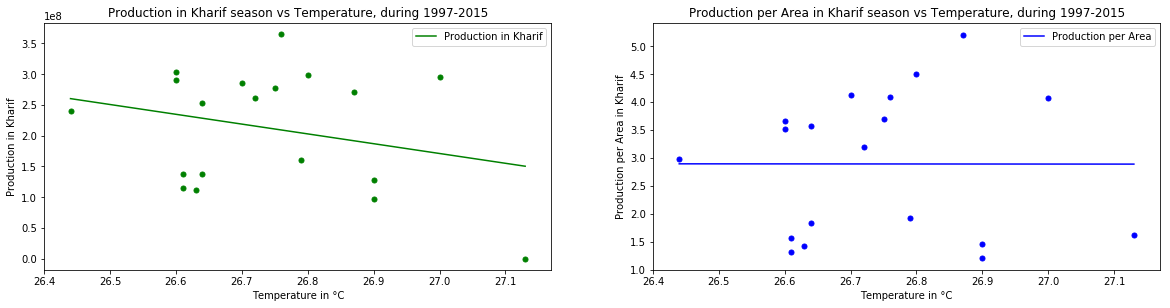

We observe negative correlation between Temperature vs Production in Kharif Season and no correlation between Temperature vs Production per Area in Kharif Season. 



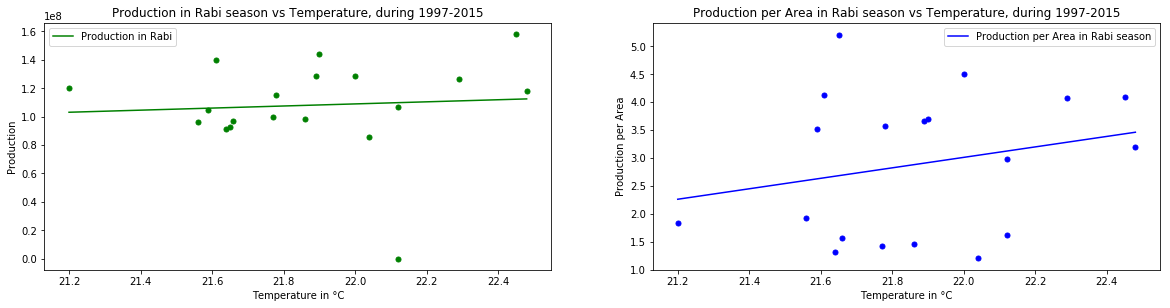

There is positive correlation between Production vs Temperature in Rabi Season and between Production per Area and Temperature.


In [412]:
#Temperature vs Kharif Crop  
crop_prod_kharif = df_crop_produce[df_crop_produce['Season'] == 'Kharif'].groupby(['Crop_Year'])['Production'].sum() 
crop_area_kharif = df_crop_produce[df_crop_produce['Season'] == 'Kharif'].groupby(['Crop_Year'])['Area'].sum() 
prod_per_area_kharif = [float(p)/a for p, a in zip(crop_prod, crop_area)]

plt.figure(figsize=(20,10)) 
plt.subplot(2, 2, 1) 
plt.scatter(df_temp['Kharif'] , crop_prod_kharif.values, s = 25, c = 'green')  
plt.plot(np.unique(df_temp['Kharif']), np.poly1d(np.polyfit(df_temp['Kharif'], crop_prod_kharif.values, 1))(np.unique(df_temp['Kharif']))\
              , c='green', label='Production in Kharif')
plt.xlabel('Temperature in °C', {'fontsize' : 'medium'})
plt.ylabel('Production in Kharif') 
plt.title('Production in Kharif season vs Temperature, during 1997-2015')  
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df_temp['Kharif'], prod_per_area_kharif, s = 25, c = 'blue')  
plt.plot(np.unique(df_temp['Kharif']), np.poly1d(np.polyfit(df_temp['Kharif'], prod_per_area_kharif, 1))(np.unique(df_temp['Kharif']))\
         , c='blue', label='Production per Area')
plt.xlabel('Temperature in °C', {'fontsize' : 'medium'})
plt.ylabel('Production per Area in Kharif') 
plt.title('Production per Area in Kharif season vs Temperature, during 1997-2015')  
plt.legend()
plt.show()
print('We observe negative correlation between Temperature vs Production in Kharif Season and no correlation between Temperature \
vs Production per Area in Kharif Season.', '\n')

plt.figure(figsize=(20,10)) 
plt.subplot(2, 2, 1) 
crop_prod_rabi = df_crop_produce[df_crop_produce['Season'] == 'Rabi'].groupby(['Crop_Year'])['Production'].sum() 
crop_area_rabi = df_crop_produce[df_crop_produce['Season'] == 'Rabi'].groupby(['Crop_Year'])['Area'].sum() 
prod_per_area_rabi = [float(p)/a for p, a in zip(crop_prod, crop_area)]

plt.scatter(df_temp['Rabi'], crop_prod_rabi.values, s = 25, c = 'green')  
plt.plot(np.unique(df_temp['Rabi']), np.poly1d(np.polyfit(df_temp['Rabi'], crop_prod_rabi.values, 1))(np.unique(df_temp['Rabi']))\
              , c='green', label='Production in Rabi')
plt.xlabel('Temperature in °C', {'fontsize' : 'medium'})
plt.ylabel('Production') 
plt.title('Production in Rabi season vs Temperature, during 1997-2015')  
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df_temp['Rabi'], prod_per_area_rabi, s = 25, c = 'blue')  
plt.plot(np.unique(df_temp['Rabi']), np.poly1d(np.polyfit(df_temp['Rabi'], prod_per_area_rabi, 1))(np.unique(df_temp['Rabi']))\
         , c='blue', label='Production per Area in Rabi season')
plt.xlabel('Temperature in °C', {'fontsize' : 'medium'})
plt.ylabel('Production per Area') 
plt.title('Production per Area in Rabi season vs Temperature, during 1997-2015')  
plt.legend()
plt.show()   
print('There is positive correlation between Production vs Temperature in Rabi Season and between Production per Area \
and Temperature.')

## Crop Production vs Rainfall

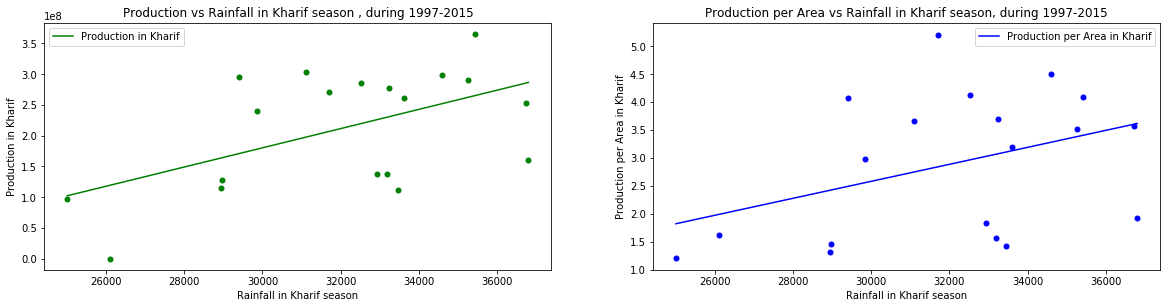

We observe positive correlation between Production vs Rainfall in Kharif Season and between Production per Area and Rainfall in Kharif Season. 



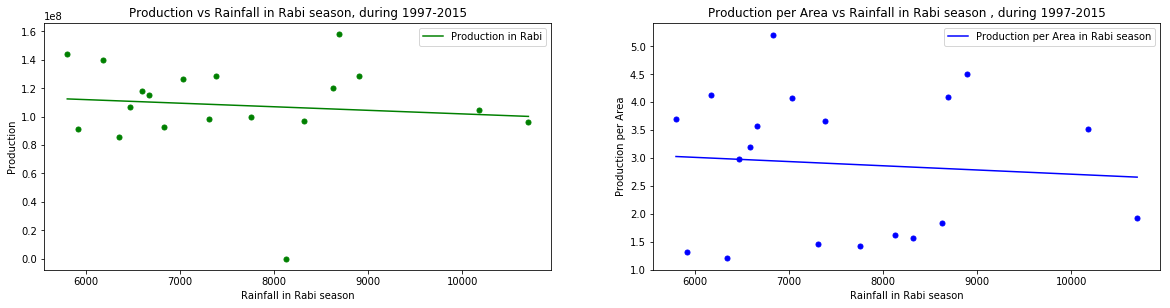

We clearly observe that Rainfall in Rabi season is negatively correlated with Production in Rabi Season. A look inhttps://en.wikipedia.org/wiki/Rabi_crop also reiterate the same observation "A good rain in winter spoils the rabi crops but is good for kharif crops."


In [394]:
#Kharif Crop vs Rainfall
rainfall = df_rainfall[df_rainfall['Parameter'] == 'Actual'].groupby(['YEAR'])['Khariff'].sum()
crop_prod_kharif = df_crop_produce[df_crop_produce['Season'] == 'Kharif'].groupby(['Crop_Year'])['Production'].sum() 
crop_area_kharif = df_crop_produce[df_crop_produce['Season'] == 'Kharif'].groupby(['Crop_Year'])['Area'].sum() 
prod_per_area_kharif = [float(p)/a for p, a in zip(crop_prod, crop_area)]

plt.figure(figsize=(20,10)) 
plt.subplot(2, 2, 1) 
plt.scatter(rainfall.values, crop_prod_kharif.values, s = 25, c = 'green')  
plt.plot(np.unique(rainfall.values), np.poly1d(np.polyfit(rainfall.values, crop_prod_kharif.values, 1))(np.unique(rainfall.values))\
              , c='green', label='Production in Kharif')
plt.xlabel('Rainfall in Kharif season', {'fontsize' : 'medium'})
plt.ylabel('Production in Kharif') 
plt.title('Production vs Rainfall in Kharif season , during 1997-2015')  
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(rainfall.values, prod_per_area_kharif, s = 25, c = 'blue')  
plt.plot(np.unique(rainfall.values), np.poly1d(np.polyfit(rainfall.values, prod_per_area_kharif, 1))(np.unique(rainfall.values))\
         , c='blue', label='Production per Area in Kharif')
plt.xlabel('Rainfall in Kharif season', {'fontsize' : 'medium'})
plt.ylabel('Production per Area in Kharif') 
plt.title('Production per Area vs Rainfall in Kharif season, during 1997-2015')  
plt.legend()
plt.show()
print('We observe positive correlation between Production vs Rainfall in Kharif Season and between Production per \
Area and Rainfall in Kharif Season.', '\n')

#Rabi crop vs Rainfall
plt.figure(figsize=(20,10)) 
plt.subplot(2, 2, 1) 
rainfall = df_rainfall[df_rainfall['Parameter'] == 'Actual'].groupby(['YEAR'])['Rabi'].sum()
crop_prod_rabi = df_crop_produce[df_crop_produce['Season'] == 'Rabi'].groupby(['Crop_Year'])['Production'].sum() 
crop_area_rabi = df_crop_produce[df_crop_produce['Season'] == 'Rabi'].groupby(['Crop_Year'])['Area'].sum() 
prod_per_area_rabi = [float(p)/a for p, a in zip(crop_prod, crop_area)]

plt.scatter(rainfall.values, crop_prod_rabi.values, s = 25, c = 'green')  
plt.plot(np.unique(rainfall.values), np.poly1d(np.polyfit(rainfall.values, crop_prod_rabi.values, 1))(np.unique(rainfall.values))\
              , c='green', label='Production in Rabi')
plt.xlabel('Rainfall in Rabi season', {'fontsize' : 'medium'})
plt.ylabel('Production') 
plt.title('Production vs Rainfall in Rabi season, during 1997-2015')  
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(rainfall.values, prod_per_area_rabi, s = 25, c = 'blue')  
plt.plot(np.unique(rainfall.values), np.poly1d(np.polyfit(rainfall.values, prod_per_area_rabi, 1))(np.unique(rainfall.values))\
         , c='blue', label='Production per Area in Rabi season')
plt.xlabel('Rainfall in Rabi season', {'fontsize' : 'medium'})
plt.ylabel('Production per Area') 
plt.title('Production per Area vs Rainfall in Rabi season , during 1997-2015')  
plt.legend()
plt.show()   
print('We clearly observe that Rainfall in Rabi season is negatively correlated with Production in Rabi Season. A look in\
https://en.wikipedia.org/wiki/Rabi_crop also reiterate the same observation "A good rain in winter spoils the rabi crops but \
is good for kharif crops."')


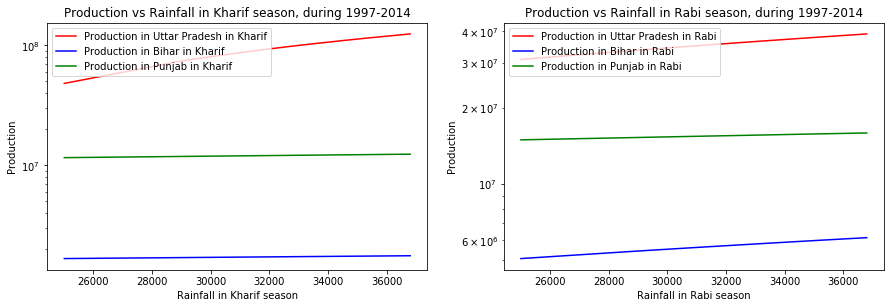

Unlike, earlier observation where in Rabi season, rainfall showed a negative correlationwith crop production, here we observe that, both Kharif and Rabi crops production show a positive correlation with Rainfall in Andhra Pradesh, Punjab and Uttar Pradesh


In [401]:
#plot of rainfall vs crop prodcution in few states
#Rabi crop vs Rainfall 
plt.figure(figsize=(15,10)) 

#Years 1997 to 2014
rainfall = df_rainfall[df_rainfall['Parameter'] == 'Actual'].groupby(['YEAR'])['Khariff'].sum()
rainfall = rainfall[:-1] 

crop_prod_kharif = df_crop_produce[(df_crop_produce['Season'] == 'Kharif')].groupby(['Crop_Year','State_Name'])['Production'].sum() 
crop_area_kharif = df_crop_produce[df_crop_produce['Season'] == 'Kharif'].groupby(['Crop_Year', 'State_Name'])['Area'].sum() 
colors = ['red', 'blue', 'green']

plt.subplot(2, 2, 1) 
for i, state in enumerate(['Uttar Pradesh','Bihar', 'Punjab']):
    state_prod = [crop_prod_kharif[year][state] for year in range(1997,2015)]  
    plt.plot(np.unique(rainfall.values), np.poly1d(np.polyfit(rainfall.values, state_prod, 1))(np.unique(rainfall.values))\
                  , c=colors[i], label='Production in %s in Kharif'%state)
    plt.xlabel('Rainfall in Kharif season', {'fontsize' : 'medium'})
    plt.ylabel('Production') 
    plt.yscale('log')
    plt.title('Production vs Rainfall in Kharif season, during 1997-2014')  
    plt.legend() 

crop_prod_rabi = df_crop_produce[(df_crop_produce['Season'] == 'Rabi')].groupby(['Crop_Year','State_Name'])['Production'].sum() 
crop_area_rabi = df_crop_produce[df_crop_produce['Season'] == 'Rabi'].groupby(['Crop_Year', 'State_Name'])['Area'].sum()  
plt.subplot(2, 2, 2) 
for i, state in enumerate(['Uttar Pradesh','Bihar', 'Punjab']):
    state_prod = [crop_prod_rabi[year][state] for year in range(1997,2015)] 
    plt.plot(np.unique(rainfall.values), np.poly1d(np.polyfit(rainfall.values,  state_prod, 1))(np.unique(rainfall.values))\
                  , c=colors[i], label='Production in %s in Rabi'%state)
    plt.xlabel('Rainfall in Rabi season', {'fontsize' : 'medium'})
    plt.ylabel('Production')  
    plt.yscale('log')
    plt.title('Production vs Rainfall in Rabi season, during 1997-2014')  
    plt.legend() 

plt.show() 
print('Unlike, earlier observation where in Rabi season, rainfall showed a negative correlation\
with crop production, here we observe that, both Kharif and Rabi crops production show a \
positive correlation with Rainfall in Andhra Pradesh, Punjab and Uttar Pradesh')

## Conclusion

Temperature: Annually temperature has been increasing during the period, 1997-2015

Rainfall: There is a cyclic pattern to Annual Rainfall

Crop Production: Overall, it is constant or increasing very slightly. North-Central and Eastern belt account for a large percentage of India's crop production. 

Kharif season is the most important season for farming as it accounts for the large fraction of production. Jute and Rice are the most cultivated crop in Eastern and north-central belt in Kharif season. Wheat is the most important crop cultivated in Rabi season

Sunlight is positively correlated to Crop Production in Rabi season but not so much in Kharif season. A good rain in winter spoils the rabi crops but is good for kharif crops. Finally, observed negative correlation between Temperature and Rainfall

In [413]:
#save the data
import pickle
with open('df_crop_produce.pickle', 'wb') as handle:
    pickle.dump(df_crop_produce, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('df_rainfall.pickle', 'wb') as handle:
    pickle.dump(df_rainfall, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('df_temp.pickle', 'wb') as handle:
    pickle.dump(df_temp, handle, protocol=pickle.HIGHEST_PROTOCOL)
